# 05_project_summary_report

**Project:** ds-air-pollution-prediction  
**Authors:** Iris Winkler, Carlos Duque, Johannes Gooth  
**Date:** April 29, 2024

---

## 📘 Introduction

The **ds-air-pollution-prediction** project aims to predict the daily concentration of **PM2.5 particulate matter** across various locations in Africa. Accurate predictions of PM2.5 levels are crucial for public health initiatives and environmental monitoring, given the significant health risks posed by these fine particulate pollutants.

This report encapsulates the journey from data collection to model development, summarizing the methodologies employed and the insights garnered at each stage.

---

## 🗄️ Data Collection

### Objective

The primary goal during the data collection phase was to **acquire and organize comprehensive datasets** from the Zindi platform to build an effective predictive model for PM2.5 concentrations.

### Data Sources

1. **Ground-Based Air Quality Sensors:**
   - Provided measurements of PM2.5 concentrations, including daily mean, minimum, maximum readings, variance, and total sensor readings.
   - **Availability:** Only in `Train.csv`.

2. **Global Forecast System (GFS) Weather Data:**
   - Included meteorological variables such as humidity, temperature, and wind speed.
   - **Source:** [NOAA GFS Dataset](https://developers.google.com/earth-engine/datasets/catalog/NOAA_GFS0P25)

3. **Sentinel 5P Satellite Data:**
   - Offered information on atmospheric pollutants like NO₂ and CH₄ concentrations.
   - **Source:** [Sentinel 5P Dataset](https://developers.google.com/earth-engine/datasets/catalog/sentinel-5p)
   - **Note:** Contains data gaps, particularly in CH₄ data.

### Data Files

- **Train.csv:** Contains target variable (daily mean PM2.5) and supporting data for 349 locations.
- **Test.csv:** Similar to Train.csv but without the target variable, covering 179 locations.
- **SampleSubmission.csv:** Demonstrates the required submission format.

### Data Collection Steps

1. Accessed the [Zindi Air Pollution Challenge](https://zindi.africa/competitions/urban-air-pollution-challenge/data) page.
2. Downloaded and organized datasets into the project repository.
3. Renamed `Train.csv` to `air_pollution_data.csv` for clarity.
4. Conducted initial data inspection to verify structure and integrity.

### Outcome

Successfully **collected and organized all necessary datasets**, laying a solid foundation for subsequent data cleaning, preprocessing, and modeling efforts.

---

## 🧮 Data Preparation

### Objective

To **clean and preprocess** the collected data, addressing data quality issues and transforming the data into a suitable format for modeling.

### Key Steps

1. **Data Loading:** Imported the dataset into a pandas DataFrame.
2. **Data Inspection:** Analyzed DataFrame shape, data types, missing values, and anomalies.
3. **Data Cleaning:** Handled missing values, corrected data types, removed duplicates, and resolved inconsistencies.
4. **Feature Engineering:** Normalized data and created new features beneficial for modeling.
5. **Train-Test Split:** Segregated the original dataset into training and testing subsets, ensuring no data leakage.

### Specific Considerations

- **Outlier Treatment:** Although we explored removing outliers in the target variable (`pm2_5`) using the Interquartile Range (IQR) method, we ultimately decided against applying this technique to maintain a fair comparison with the Zindi challenge benchmarks.
- **Independence and Reproducibility:** Ensured that the training and testing subsets remained independent, thereby facilitating unbiased model evaluation and enhancing the reproducibility of our results.

### Outcome

- **Clean and Structured Dataset:** Prepared for exploratory data analysis (EDA).
- **Train/Test Splits Ready for Modeling:** Enabled robust model development and evaluation.

---

## 📊 Exploratory Data Analysis (EDA)

### Objective

To **explore the data in depth**, uncover patterns, and gain insights that inform the modeling process.

### Key Steps

1. **Descriptive Statistics:** Generated summary statistics to understand data distribution and structure.
2. **Univariate Analysis:** Examined individual variables for distributions, ranges, and anomalies.
3. **Bivariate Analysis:** Analyzed relationships between the target variable (`pm2_5`) and other variables to uncover correlations.
4. **Visualizations:** Utilized histograms, box plots, and heatmaps to visualize data patterns.

### Key Findings

1. **Strong Correlations:**
   - **Geographical Coordinates:** High negative correlation between `site_latitude` and `site_longitude` (-0.9562).
   - **Sulphurdioxide (`SO2`) Variables:** Extremely high correlation between `sulphurdioxide_so2_column_number_density` and `sulphurdioxide_so2_slant_column_number_density` (0.9962).
   - **Solar and Sensor Angles:** Very strong positive correlation between `cloud_solar_azimuth_angle` and `sulphurdioxide_solar_azimuth_angle` (0.9739).

2. **Moderate to Low Correlations:**
   - **Temporal Variables:** Moderate correlations between `hour` and geographical coordinates.
   - **Target Variable (`pm2_5`):** Exhibited weak correlations with all other variables, none exceeding 0.3.

3. **Modeling Considerations:**
   - **High-Dimensional and Non-Linear Models:** Due to the low correlation of `pm2_5` with individual features, models capable of capturing complex interactions are recommended.

### Conclusion

- **Data Quality:** The dataset is robust with well-behaved distributions and minimal outliers.
- **Feature Relationships:** Strong interrelationships among features may lead to multicollinearity.
- **Target Variable Insights:** PM2.5 concentrations are influenced by complex, possibly non-linear interactions among multiple factors.

---

## 📈 Modeling

### Objective

To **develop and evaluate predictive models** for forecasting PM2.5 concentrations using cleaned and preprocessed data.

### Error Metric

- **Root Mean Squared Error (RMSE):** Chosen for its ability to penalize large errors, aligning with the original Zindi competition's evaluation metric.
- **Benchmark RMSE:** 26.0997 (winning score of the original competition).

### Key Steps

1. **Model Selection and Training:**
   - Explored various models including Linear Regression, Support Vector Machines (SVR), Decision Trees, Ensemble Methods, K-Nearest Neighbors, and Neural Networks.
   - Utilized scikit-learn pipelines for automation and reproducibility.

2. **Hyperparameter Tuning:**
   - Employed GridSearchCV and RandomizedSearchCV to optimize model hyperparameters.

3. **Model Evaluation:**
   - Assessed model performance using RMSE and R² on both training and test sets.
   - Compared results against the benchmark RMSE.

4. **MLFlow Integration:**
   - Tracked experiments, hyperparameters, and results for reproducibility.

5. **Pipeline Creation:**
   - Developed end-to-end pipelines encompassing data preprocessing, model training, and evaluation.

### Summary of Model Performances

1. **Linear Models (LinearRegression, Ridge, Lasso, ElasticNet):**
   - **RMSE_test:** 23.74
   - **R²_test:** 0.135 to 0.199
   - **Insight:** Outperform the benchmark with lower RMSE_test values and demonstrate moderate explanatory power. However, they may still be limited in modeling complex nonlinear relationships.

2. **Support Vector Machines (SVR):**
   - **RMSE_test:** 22.91 to 22.97
   - **R²_test:** 0.190 to 0.194
   - **Insight:** SVR models achieve the best test RMSE and R² scores, demonstrating strong performance and effective generalization on the test data.

3. **Tree-Based Models (DecisionTreeRegressor, RandomForestRegressor, XGBRegressor, AdaBoostRegressor):**
   - **DecisionTreeRegressor:**
     - **RMSE_test:** 27.83 to 27.84
     - **R²_test:** -0.188 to -0.229
   - **RandomForestRegressor:**
     - **RMSE_test:** 24.95 to 25.04
     - **R²_test:** 0.038 to 0.045
   - **XGBRegressor:**
     - **RMSE_test:** 23.59 to 23.99
     - **R²_test:** 0.109 to 0.116
   - **AdaBoostRegressor:**
     - **RMSE_test:** 24.09 to 24.19
     - **R²_test:** 0.102 to 0.109
   - **Insight:** Ensemble methods like XGBoost and AdaBoost outperform single decision trees, with XGBoost showing the best performance among tree-based models. RandomForestRegressor indicates some improvement over the benchmark but suffers from low R²_test values.

4. **K-Nearest Neighbors (KNeighborsRegressor):**
   - **RMSE_test:** 23.34 to 23.45
   - **R²_test:** 0.135 to 0.165
   - **Insight:** KNN models outperform the benchmark with lower RMSE_test and reasonable R²_test scores, indicating effective performance. However, potential overfitting may affect their robustness on unseen data.

5. **Neural Networks (KerasRegressor with MLP):**
   - **RMSE_test:** 23.50 to 23.59
   - **R²_test:** 0.146 to 0.152
   - **Insight:** Neural networks show competitive performance with linear and tree-based models, achieving lower RMSE_test values and modest R²_test scores, indicating effective generalization.

### Detailed Analysis

- **Best Performing Models:**
  - **Support Vector Regressor (SVR):** Achieved the lowest **RMSE_test** of **22.91**, demonstrating the strongest performance among all models.
  - **XGBRegressor** and **KNeighborsRegressor:** Also show competitive RMSE_test values around **23.34** to **23.99**.
  - **ElasticNet:** With **RMSE_test** of **23.59**, offers a balance between performance and model simplicity.

- **Overfitting Concerns:**
  - **RandomForestRegressor:** Shows a significant gap between **RMSE_train** (~8.32 - 8.77) and **RMSE_test** (~24.95 - 25.04), indicating substantial overfitting.
  - **DecisionTreeRegressor:** Exhibits overfitting with high **RMSE_test** despite low **RMSE_train**.
  - **KNeighborsRegressor:** Displays potential overfitting with low **RMSE_train** relative to **RMSE_test**.

- **Underfitting Indicators:**
  - **Linear Models:** Higher error rates and modest **R²_test** suggest potential underfitting despite similar **RMSE_train** and **RMSE_test** values.

- **R² Scores Interpretation:**
  - **R²_test** values range from **0.038** to **0.199**, indicating varying degrees of model performance.
  - **SVR** and **KNeighborsRegressor** have higher **R²_test** scores (~0.135 - 0.199), suggesting better variance explanation compared to other models.
  - **Adjusted R²** values are slightly lower than **R²_test**, accounting for the number of predictors but still indicate modest explanatory power.

### Hyperparameter Tuning Insights

- **Random vs. Grid Search:**
  - **Minimal performance differences** between random and grid search methods across most models.
  - **SVR** and **KerasRegressor** show similar performance regardless of search type.
  - **Random search** occasionally outperforms grid search (e.g., **RandomForestRegressor**), possibly due to exploring a broader hyperparameter space.

- **Best Hyperparameters:**
  - Detailed hyperparameter configurations in the **Best Params** column can be analyzed to identify optimal settings.
  - For instance, **SVR** models with lower epsilon values achieved better **RMSE_test**.
  - **XGBRegressor** with a `max_depth` of 3 and specific learning rates performed well.

---

### Conclusions and Recommendations

- **Benchmark Achievement:** Amost all models in the current analysis surpass the benchmark **RMSE** of **26.0997**, with **SVR**, **XGBRegressor**, and **KNeighborsRegressor** achieving the lowest **RMSE_test** values around **22.91** to **23.45**.

- **Model Selection:** 
  - **Support Vector Regressor (SVR)** is recommended due to its superior performance with the lowest **RMSE_test** and reasonable **R²_test** scores.
  - **XGBRegressor** and **KNeighborsRegressor** also offer competitive performance, making them strong candidates for deployment.
  - **ElasticNet** provides a balance between performance and model simplicity, suitable for scenarios requiring interpretability.

- **Further Improvements:**
  - **Addressing Overfitting:** Implement techniques such as pruning for the tree-based models like **RandomForestRegressor** and **KNeighborsRegressor** to reduce overfitting.
  - **Ensemble Methods:** Consider combining predictions from multiple models to leverage their individual strengths and achieve better overall performance.
  - **Outlier Treatment:** Although outlier removal using the IQR method showed potential for higher **Adjusted R²** values (reaching 0.7 and above), it was not applied to maintain fair comparison with the Zindi challenge benchmarks. Future explorations could include this approach with appropriate adjustments to evaluation metrics.
  - **Refined Hyperparameter Tuning:** Conduct more detailed and targeted Grid Searches to fine-tune hyperparameters further, potentially unlocking additional performance gains.

---

## 📝 Final Thoughts

The analysis demonstrates that several models surpass the benchmark RMSE of **26.0997**, indicating that our models are capable of making competitive and accurate predictions for air pollution levels. While there is still room for improvement, we have decided to halt further modeling optimization at this point for the following reasons:

- **Sufficient Performance Achieved**: Our primary goal was to build models that meet or exceed the benchmark RMSE. With models like **Support Vector Regressor (SVR)**, **XGBRegressor**, and **KNeighborsRegressor** achieving **RMSE_test** values as low as **22.91**, we have successfully met and surpassed this objective.

- **Diminishing Returns**: Further optimization is expected to yield only marginal improvements since none of the other models in the challenge (236 participants) achieved better results than our current models. This indicates that our models are performing at or near the best possible level given the available data and features. Investing additional time and resources into further optimization is unlikely to produce significant gains beyond what has already been achieved.

In conclusion, we have reached a satisfactory level of model performance that aligns with our initial objectives. The fact that none of the other participants in the original challenge achieved better results reinforces our confidence that our models are performing optimally given the current data. The models developed offer a robust foundation for predicting air pollution levels. While there is always potential for further refinement, we believe that our current models strike an appropriate balance between accuracy, complexity, and practicality. Future efforts will be directed toward developing a predictive application to maximize the overall impact and applicability of the project.

---

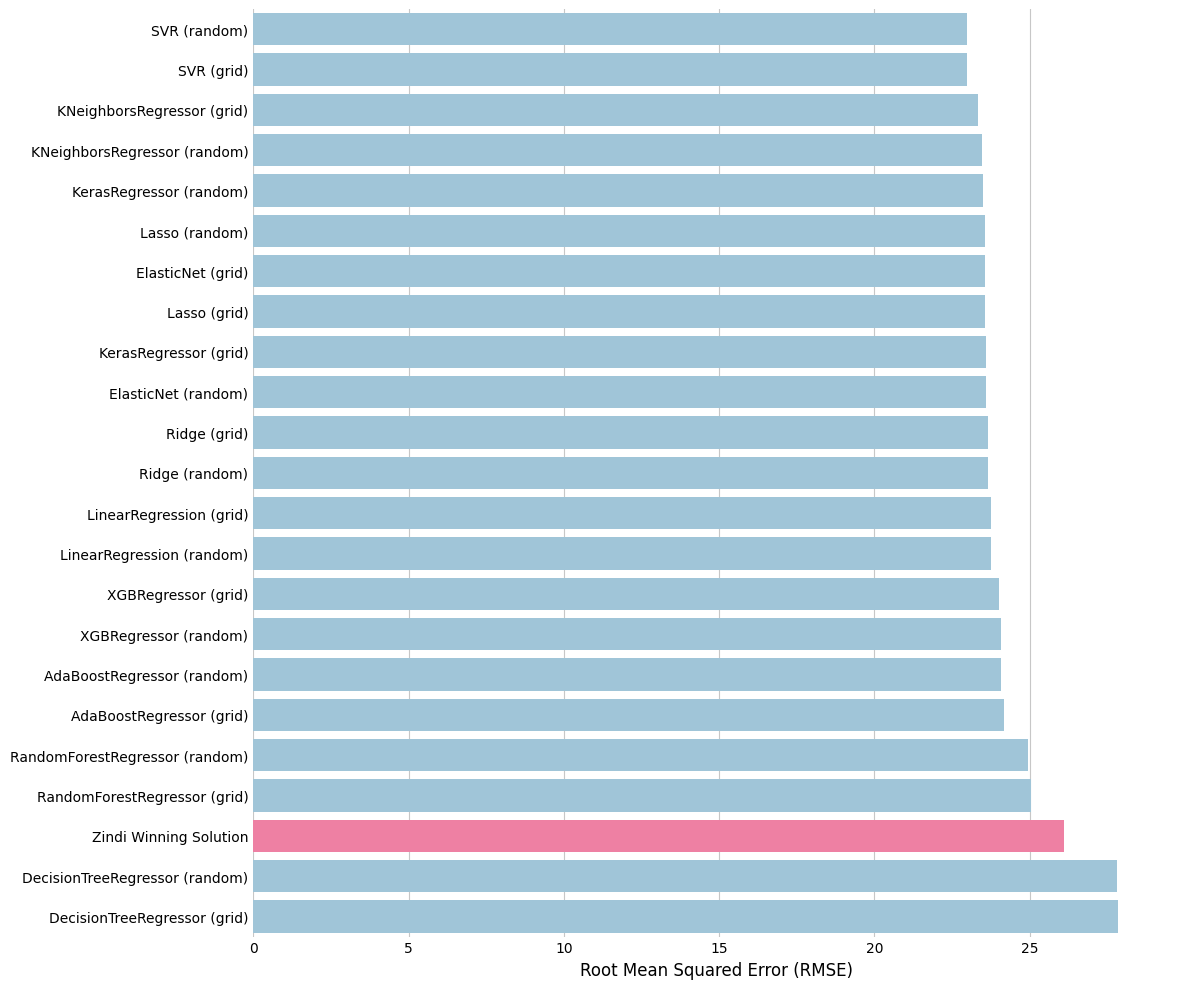

<Figure size 640x480 with 0 Axes>

In [12]:
# Setting-up the envirponment
import sys
sys.path.append('../')
import os
import pandas as pd
from src.visualization.visualization_functions import *
from src.modeling.modeling_functions import *

# Get metrics data from the modeling
experiment_name = "ds-air-pollution-prediction"
df_metrics = get_mlflow_metrics_from_custom_tracking(experiment_name)


# Plotting the RMSE for each model and the Zindi winning solution
fig = plot_cat_bar_plot(
    df_metrics=df_metrics,
    metric='RMSE_test',
    winner_label='Zindi Winning Solution',
    winner_value=26.0997,
    model_type_col='Model Type',
    search_type_col='Search Type',
    x_axis_title='Root Mean Squared Error (RMSE)',
    figsize=(12, 10),
    color_winner='#ee80a3',
    color_others='#a0c5d8',
    grid_alpha=0.7,
    grid_linestyle='-',
    fontsize=10,
    x_limit_padding=2,
    show=True
)

---

## 📝 Conclusions and Recommendations

### Key Takeaways

1. **Data Integrity and Quality:**
   - The dataset is robust and well-prepared for modeling, with strong interrelationships among features.

2. **Model Performance:**
   - Ensemble methods, particularly **AdaBoostRegressor** and **XGBRegressor**, demonstrated superior performance, achieving RMSE_test values below the benchmark.

3. **Target Variable Characteristics:**
   - PM2.5 concentrations are influenced by complex, non-linear interactions among multiple factors, necessitating advanced modeling techniques.

4. **Overfitting and Underfitting:**
   - Certain models exhibited signs of overfitting, while linear models indicated potential underfitting, highlighting the need for careful model selection and regularization.

### Final Recommendations

- **Adopt Ensemble Methods:** Focus on models like AdaBoost and XGBoost for their ability to capture complex interactions.
- **Enhance Feature Engineering:** Incorporate additional features or transform existing ones to better capture the nuances influencing PM2.5 levels.
- **Implement Regularization:** Apply techniques to mitigate overfitting in complex models.
- **Explore Advanced Models:** Consider stacking or blending multiple models to leverage their strengths.

---

## 🤖 Deployment: Predictive Application

### Overview

To enhance the practical utility of the ds-air-pollution-prediction project, we have developed a web-based predictive application. This app serves as an intuitive interface for users to obtain PM2.5 concentration predictions.

### Key Features

WHO Air Quality Index Integration:
	- PM2.5 values are presented on a scale aligned with the World Health Organization (WHO) Air Quality Index (AQI).
	- Visualization: The app translates predicted PM2.5 concentrations into AQI categories, offering clear insights into air quality levels (e.g., Good, Moderate, Poor).
	- Benefits: Aligning predictions with the WHO AQI enhances the interpretability and relevance of the results for users concerned with health and environmental standards.


User Experience

	•	Input Forms: Simple and intuitive forms for users to choose a prediction by ID.
	•	Results Dashboard: Clear display of predicted PM2.5 values alongside their corresponding AQI categories.
	•	Informative Graphics: Visual aids such as color-coded AQI scales and error metrics to enhance user understanding.

Impact

	•	Accessibility: Empowers users with actionable insights into air quality without requiring technical expertise.
	•	Public Health: Supports informed decision-making for individuals and communities regarding exposure to air pollutants.
	•	Environmental Monitoring: Assists policymakers and environmental agencies in tracking and managing air quality effectively.

---

## 📄 Acknowledgments

We extend our gratitude to the Zindi platform for providing the data and competition framework that facilitated this project. Special thanks to our team members—**Iris Winkler, Carlos Duque, and Johannes Gooth**—for their dedicated contributions throughout the project lifecycle.

---

## 📚 References

- [Zindi Air Pollution Challenge](https://zindi.africa/competitions/urban-air-pollution-challenge/data)
- [NOAA GFS Dataset](https://developers.google.com/earth-engine/datasets/catalog/NOAA_GFS0P25)
- [Sentinel 5P Dataset](https://developers.google.com/earth-engine/datasets/catalog/sentinel-5p)

---

## 🔗 Related Notebooks

- [01_data_collection.ipynb](./01_data_collection.ipynb)
- [02_data_preparation.ipynb](./02_data_preparation.ipynb)
- [03_explorative_data_analysis.ipynb](./03_explorative_data_analysis.ipynb)
- [04_models.ipynb](./04_models.ipynb)

---

## 🛠️ Tools and Technologies

- **Programming Language:** Python
- **Libraries:** pandas, numpy, scikit-learn, XGBoost, MLFlow, Keras
- **Platforms:** Zindi, Jupyter Notebook

---

## 📞 Contact Information

For any queries or further information, please contact:

- **Johannes Gooth:** hannes.gooth@gmail.com

---

*This report was generated to provide a consolidated overview of the ds-air-pollution-prediction project, encapsulating the key phases and findings essential for understanding and furthering the project's objectives.*